In [ ]:
!pip install matplotlib pandas

Error: Jupyter cannot be started. Error attempting to locate jupyter: Data Science libraries notebook and jupyter are not installed in interpreter Python 3.6.9 64-bit.

In [2]:
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt



In [3]:
data_path = 'data'

# Files produced before the sound data was available
no_sound = ['./data/readings.tsv.2020-01-13.gz', './data/readings.tsv.2020-01-20.gz', './data/readings.tsv.2020-01-27.gz', './data/readings.tsv.2020-02-03.gz', './data/readings.tsv.2020-02-10.gz', './data/readings.tsv.2020-02-17.gz', './data/readings.tsv.2020-02-24.gz', './data/readings.tsv.2020-03-02.gz']

readings_files = [os.path.join(data_path, f) for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f)) and os.path.join(data_path, f) not in no_sound ]
#readings_files = no_sound
print(readings_files)
readings = (
    pd.concat(
        [pd.read_csv(readings_file, compression='gzip', sep='\t')
         for readings_file in readings_files], 
        axis=0)
    .reset_index(drop=True)
)


['data/readings.tsv.2020-04-27.gz', 'data/readings.tsv.2020-11-16.gz', 'data/readings.tsv.2020-03-23.gz', 'data/readings.tsv.2020-01-13.gz', 'data/readings.tsv.2020-04-13.gz', 'data/readings.tsv.2020-11-30.gz', 'data/readings.tsv.2020-12-07.gz', 'data/readings.tsv.2020-01-27.gz', 'data/readings.tsv.2020-07-27.gz', 'data/readings.tsv.2020-02-24.gz', 'data/readings.tsv.2020-02-17.gz', 'data/readings.tsv.2020-10-19.gz', 'data/readings.tsv.2020-09-21.gz', 'data/readings.tsv.2020-10-12.gz', 'data/readings.tsv.2020-04-06.gz', 'data/readings.tsv.2020-03-02.gz', 'data/readings.tsv.2020-12-14.gz', 'data/readings.tsv.2020-01-20.gz', 'data/readings.tsv.2020-03-09.gz', 'data/readings.tsv.2020-09-28.gz', 'data/readings.tsv.2020-06-15.gz', 'data/readings.tsv.2020-08-17.gz', 'data/readings.tsv.2020-06-22.gz', 'data/readings.tsv.2020-11-23.gz', 'data/readings.tsv.2020-05-04.gz', 'data/readings.tsv.2020-09-07.gz', 'data/readings.tsv.2020-08-10.gz', 'data/readings.tsv.2020-05-18.gz', 'data/readings.tsv.

MemoryError: Unable to allocate 1.58 GiB for an array with shape (8, 26533872) and data type float64

In [4]:
readings.head()

NameError: name 'readings' is not defined

In [6]:
readings.info()

NameError: name 'readings' is not defined

In [7]:
readings['collection_time'] = pd.to_datetime(readings['collection_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
for column in readings.columns:
    if column not in ['collection_time']:
        readings[column] = pd.to_numeric(readings[column])

NameError: name 'readings' is not defined

In [ ]:
print(readings[readings.collection_time.isnull()])

In [197]:
readings.set_index('collection_time', inplace=True)

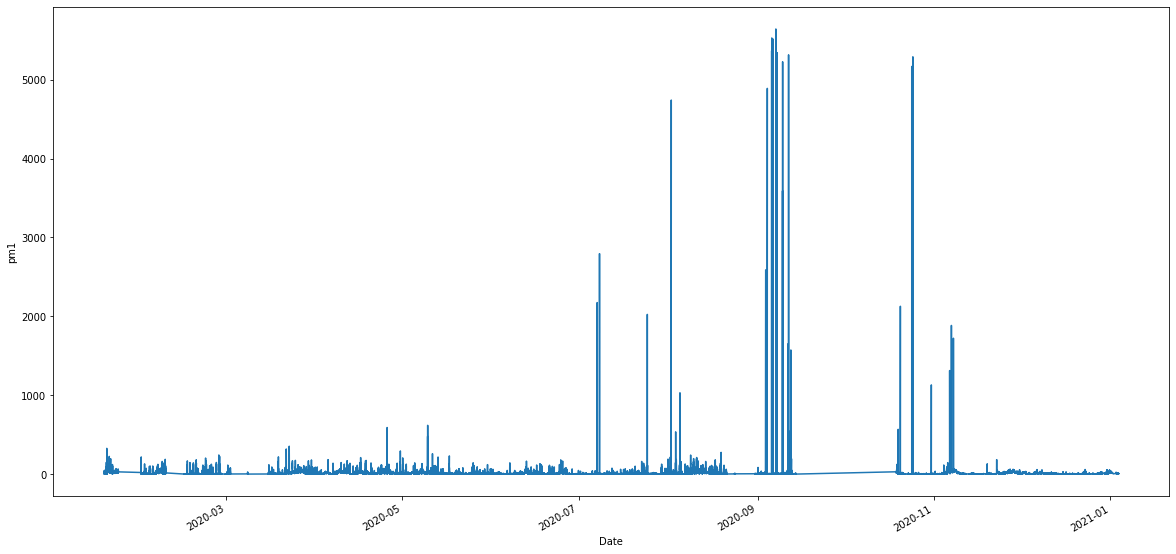

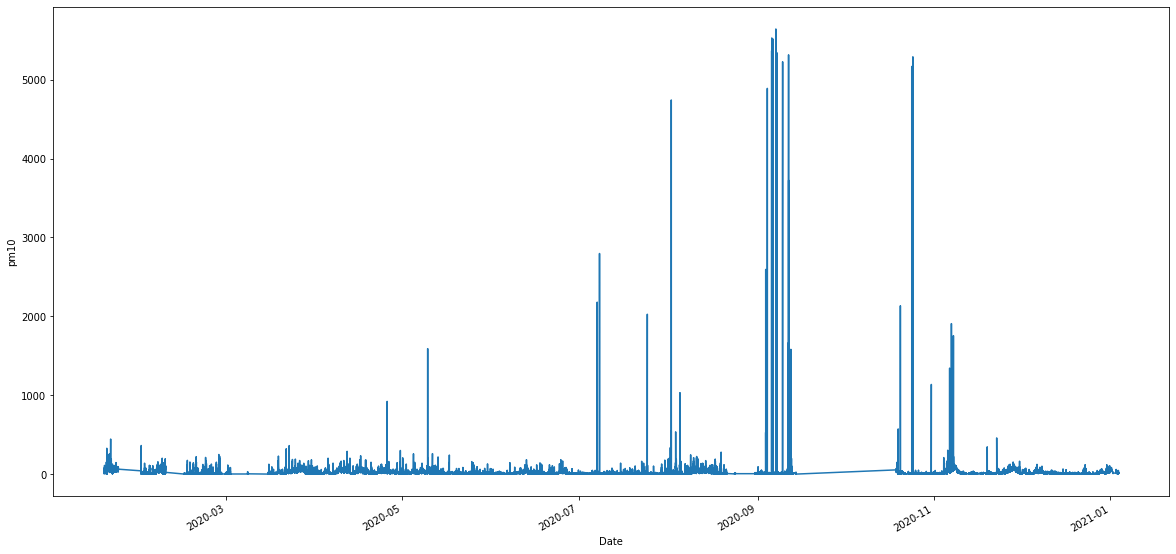

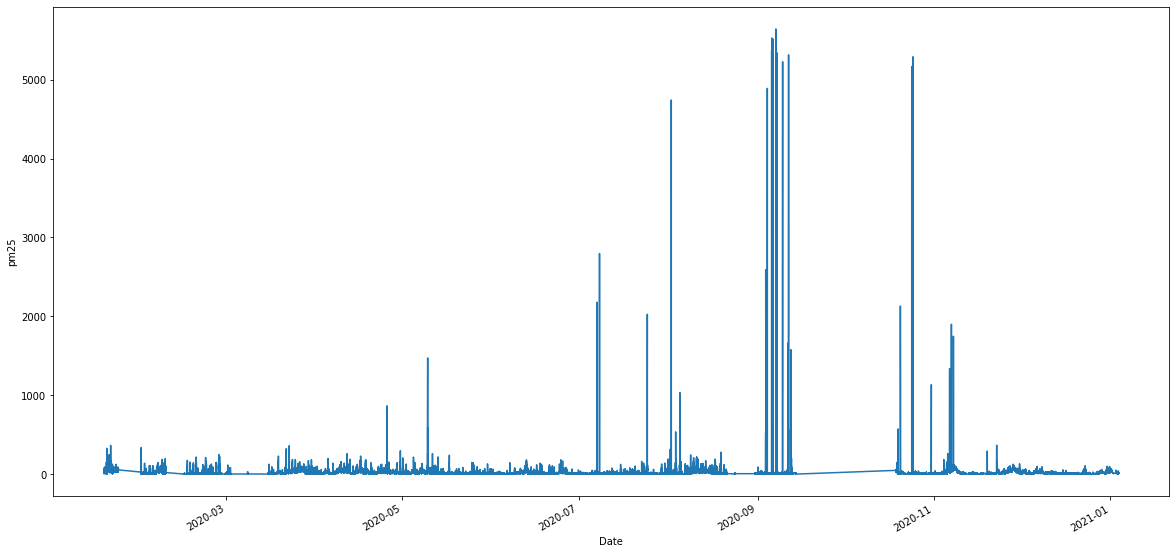

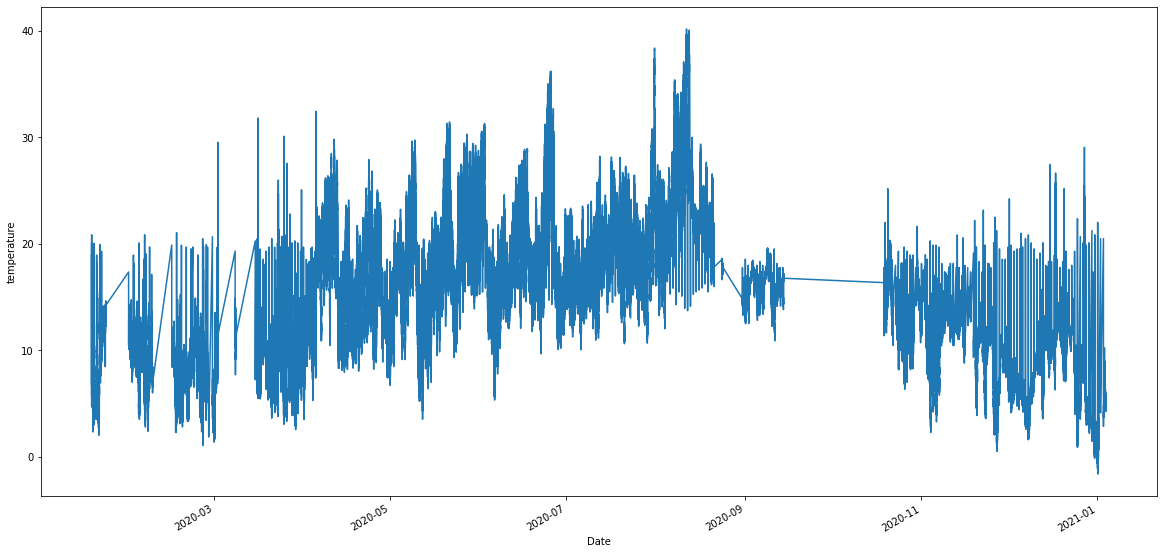

In [198]:
fig = 0
for value in ['pm1', 'pm10', 'pm25', 'temperature']:
    plt.figure(fig)
    df3 = result[~(readings[value] >= 2000)]  
    df3[value].plot(figsize=(20,10))
    plt.xlabel('Date')
    plt.ylabel(value)
    fig += 1

  